In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
df = pd.DataFrame(data.data,columns = data.feature_names)
df['Price'] = data.target
df = df.sample(frac=0.2)
df.head(5)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
9223,2.4219,34.0,4.950178,1.056940,943.0,3.355872,36.88,-120.29,0.83900
12839,3.6250,31.0,5.443243,0.978378,563.0,3.043243,38.70,-121.47,0.91300
9029,6.8300,28.0,6.748744,1.080402,487.0,2.447236,34.05,-118.78,5.00001
9075,4.8787,33.0,6.104603,1.033473,1365.0,2.855649,34.70,-118.16,1.27700
1968,4.0709,13.0,6.119891,1.118529,2093.0,2.851499,38.69,-120.70,1.51700


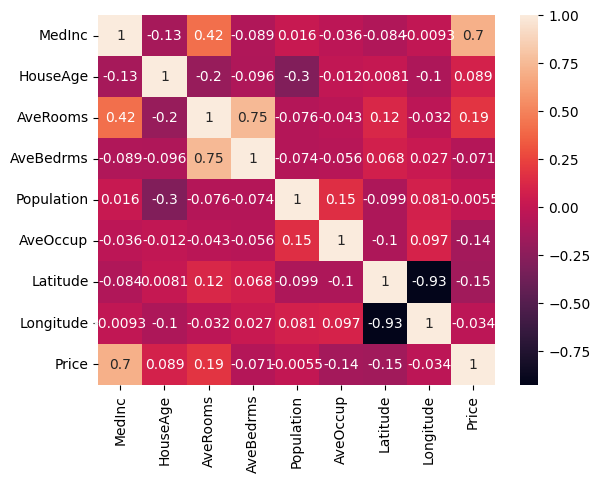

In [7]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [9]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

# print(X.shape)
# print(y.shape)


from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2889, 8)
(1239, 8)
(2889,)
(1239,)


In [10]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()

dt_regressor = model.fit(X_train,y_train)
dt_regressor

DecisionTreeRegressor()

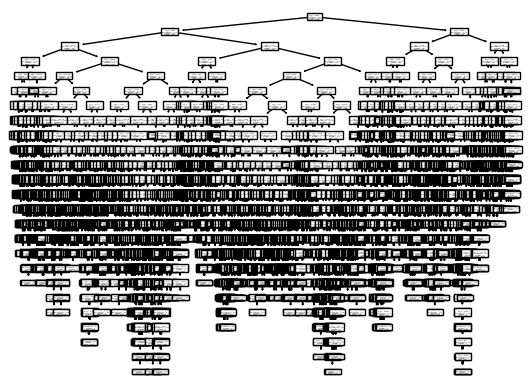

In [11]:
from sklearn import tree
tree.plot_tree(dt_regressor)
plt.show()

In [13]:
y_pred = dt_regressor.predict(X_test)
print(y_pred.shape)

(1239,)


In [14]:
from sklearn.metrics import r2_score

score = r2_score(y_pred=y_pred,y_true=y_test)
print(score)

0.5169928645796351


In [18]:
from sklearn.model_selection import GridSearchCV

params = {
    "criterion" : ["squared_error", "absolute_error", "friedman_mse", 'poisson'],
    "max_depth" : [3,4,5,6],
    "max_features" : ['auto','sqrt','log2'],
    "splitter": ['random','best']
}

hyper_param_tuning = GridSearchCV(dt_regressor,param_grid=params,cv =5,scoring ='neg_mean_squared_error',verbose =3)
hyper_param_tuning.fit(X_train,y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV 1/5] END criterion=squared_error, max_depth=3, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=3, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=3, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=3, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=3, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=3, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=3, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=3, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 4/5]

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'max_depth': [3, 4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['random', 'best']},
             scoring='neg_mean_squared_error', verbose=3)

In [19]:
print(hyper_param_tuning.best_params_)
print(hyper_param_tuning.best_score_)
model =hyper_param_tuning.best_estimator_

{'criterion': 'friedman_mse', 'max_depth': 6, 'max_features': 'log2', 'splitter': 'best'}
-0.5389600664688203


In [20]:
y_pred = model.predict(X_test)
score = r2_score(y_pred,y_test)
print(score)

0.30099428292265407


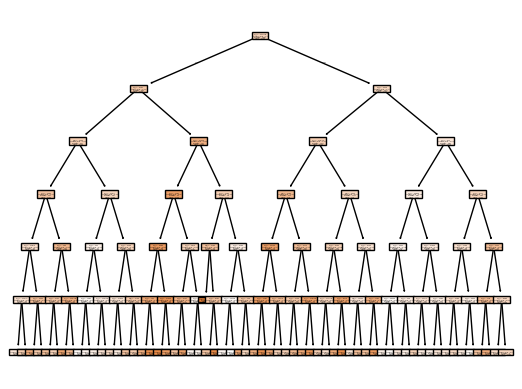

In [22]:
tree.plot_tree(model,filled=True)
plt.show()